In [20]:
import pandas as pd
import math
import seaborn as sns
import numpy as np

In [21]:
movements = pd.read_csv("../data/data_movements_9.csv")
records = pd.read_csv("../data/data_trials_9.csv")

<Axes: xlabel='x', ylabel='y'>

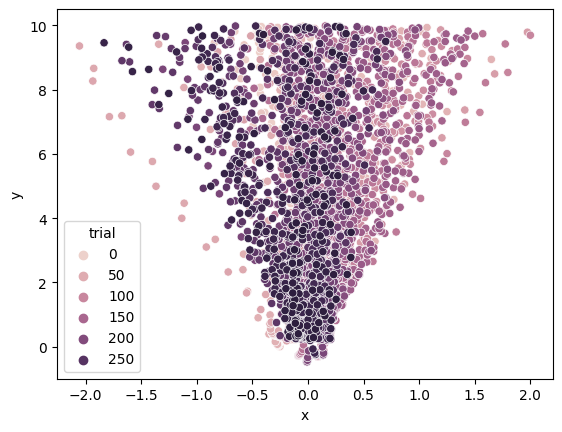

In [22]:
sns.scatterplot(data = movements.loc[movements.state == 'reach'], x = 'x', y = 'y', hue = 'trial')

In [23]:
movements

,Unnamed: 0,trial,state,sample,time,x,y
0,0,0,search_ring,0,0.008520,1.121942,2.483705
1,1,0,search_ring,1,0.016727,1.121942,2.483727
2,2,0,search_ring,2,0.034707,1.121926,2.483629
3,3,0,search_ring,3,0.050694,1.121917,2.483585
4,4,0,search_ring,4,0.066670,1.121912,2.483572
...,...,...,...,...,...,...,...
102049,318,299,iti,108304,1805.117353,-2.377908,19.344858
102050,319,299,iti,108305,1805.133341,-2.377537,19.344896
102051,320,299,iti,108306,1805.149327,-2.377410,19.344858
102052,321,299,iti,108307,1805.166347,-2.377452,19.344877


In [24]:
dist = lambda x1, y1, x2, y2: math.sqrt((y2 - y1)**2 + (x2 - x1)**2)

dx = [0]
dt = [0]
for i in range(1, len(movements)):
    prev_row = movements.iloc[i - 1]
    cur_row = movements.iloc[i]
    dx.append(dist(prev_row.x, prev_row.y, cur_row.x, cur_row.y))
    dt.append(cur_row.time - prev_row.time)

movements['dx'] = dx
movements['dt'] = dt

In [25]:
movements['vel'] = movements.dx / movements.dt

In [26]:
reach = movements.loc[movements.state == 'reach']
max_vel = reach[['trial', 'dx', 'dt', 'vel']].groupby('trial').agg({'vel': 'max'}).reset_index().rename(columns={'vel': 'max_vel'})

joined = pd.merge(reach, max_vel, on='trial', how='left')
mx_points = joined.loc[joined.vel == joined.max_vel]
first_points = reach.groupby('trial').agg(lambda x: list(x)[0]).reset_index()

In [27]:
mx_points

,Unnamed: 0,trial,state,sample,time,x,y,dx,dt,vel,max_vel
8,383,0,reach,383,6.384760,-0.176879,8.141788,1.356589,0.017993,75.394538,75.394538
19,183,1,reach,691,11.518866,-0.202232,7.631193,1.343203,0.017997,74.633176,74.633176
30,221,2,reach,1038,17.301969,-0.114213,8.130736,1.438114,0.017994,79.922323,79.922323
39,164,3,reach,1327,22.118065,-0.327520,6.966496,1.630884,0.017987,90.671668,90.671668
50,179,4,reach,1633,27.218175,-0.315258,6.627626,1.234477,0.018018,68.514678,68.514678
...,...,...,...,...,...,...,...,...,...,...,...
3649,156,295,reach,106941,1782.400277,0.242703,6.714479,1.152763,0.016003,72.033726,72.033726
3662,164,296,reach,107232,1787.251198,0.150011,6.526197,1.209825,0.018007,67.187863,67.187863
3679,198,297,reach,107557,1792.668293,-0.399985,9.713097,1.131453,0.017945,63.052231,63.052231
3688,182,298,reach,107862,1797.750422,0.219164,9.162217,1.601144,0.017035,93.991418,93.991418


In [28]:
first_points

,trial,Unnamed: 0,state,sample,time,x,y,dx,dt,vel
0,0,375,reach,375,6.251214,-0.124530,0.468087,0.309197,0.017309,17.863383
1,1,174,reach,682,11.367297,-0.018734,0.392717,0.239154,0.017270,13.848373
2,2,213,reach,1030,17.167439,-0.036171,0.313712,0.234566,0.016386,14.314655
3,3,158,reach,1321,22.018491,-0.040520,0.680257,0.504597,0.018295,27.580846
4,4,172,reach,1626,27.100568,0.028740,0.457103,0.328793,0.016303,20.166992
...,...,...,...,...,...,...,...,...,...,...
295,295,148,reach,106933,1782.269773,-0.108376,0.332732,0.268790,0.019168,14.023159
296,296,155,reach,107223,1787.100636,0.016912,0.256826,0.164415,0.017172,9.574636
297,297,185,reach,107544,1792.450724,0.049637,0.284464,0.250434,0.017186,14.571905
298,298,174,reach,107854,1797.617852,-0.088820,0.340480,0.292299,0.017173,17.020819


<Axes: xlabel='x', ylabel='y'>

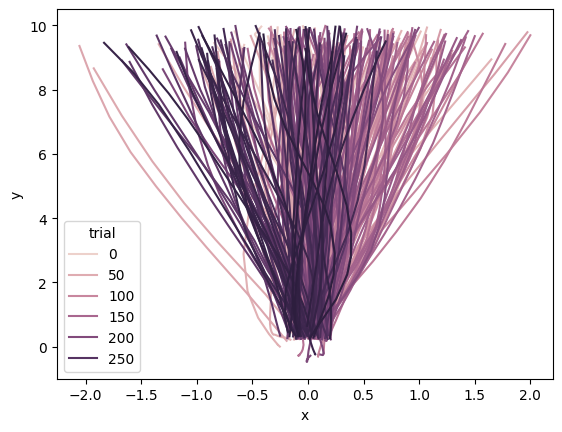

In [29]:
sns.lineplot(data = movements.loc[movements.state == 'reach'], x = 'x', y = 'y', hue = 'trial', sort = False)

In [30]:
movements = pd.read_csv('../data/data_movements_7.csv')
trials = pd.read_csv('../data/data_trials_7.csv')
trials['trial'] = trials.trial - 1

In [31]:
uncertainty_cols = ['no_uncertainty', 'low_uncertainty', 'high_uncertainty', 'unlimited_uncertainty']
def uncertainty_label(x):
    if all(x[col] == 0 for col in uncertainty_cols):
        return 'w/b'
    for col in uncertainty_cols:
        if x[col] == 1:
            return col

trials['uncertainty'] = trials.apply(uncertainty_label, axis=1)

<Axes: xlabel='x', ylabel='y'>

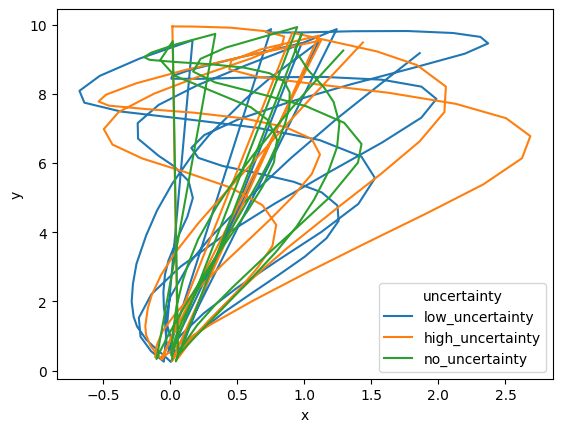

In [32]:
joined = pd.merge(movements, trials[['trial', 'uncertainty']], on='trial', how='left')

rand_trials = np.random.choice([i for i in range(110, 180)], 20)

# smpl = joined.loc[(joined.state == 'reach') & (joined.trial.isin(rand_trials))]

smpl = joined.loc[(joined.state == 'reach') & (joined.trial.isin(rand_trials) & (joined.uncertainty.isin(['low_uncertainty', 'high_uncertainty', 'no_uncertainty'])))]

sns.lineplot(data = smpl.loc[smpl.state == 'reach'], x = 'x', y = 'y', hue = 'uncertainty', sort = False)


Checking for correct recording of movements post changes to exp. run code

In [33]:
test = pd.read_csv('../data/data_movements_demo.csv')
test.loc[test.trial ==6]

,Unnamed: 0,trial,state,sample,time,x,y
3887,0,6,search_ring,3405,30.011593,0.000000,11.660156
3888,1,6,search_ring,3406,30.026200,-0.058594,11.308594
3889,2,6,search_ring,3407,30.043202,-0.117188,10.898438
3890,3,6,search_ring,3408,30.045732,-0.117188,10.898438
3891,4,6,search_ring,3409,30.059279,-0.175781,10.605469
...,...,...,...,...,...,...,...
4544,657,6,iti,4062,35.599754,1.347656,15.996094
4545,658,6,iti,4063,35.603021,1.347656,15.996094
4546,659,6,iti,4064,35.617736,1.347656,15.996094
4547,660,6,iti,4065,35.624573,1.347656,15.996094
